# EDA Notebook

 The goal of this notebook is to thoroughly understand the dataset, address any data quality issues, and extract initial insights that will guide the modeling approach in the subsequent notebooks.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration and Preprocessing

In [2]:
# Load dataset 1
heart_data = pd.read_csv('datasets/heart.csv')

In [3]:
# Display information about dataset 1
print("Heart Data Info:")
print(heart_data.info())

Heart Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [4]:
# Preview of the data in dataset 1
print("Heart Data Preview:")
print(heart_data.head())

Heart Data Preview:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [5]:
# Load dataset 2
o2_data = pd.read_csv('datasets/o2Saturation.csv')

In [6]:
# Display information about dataset 2
print("Oxygen Saturation Data Info:")
print(o2_data.info())

Oxygen Saturation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB
None


In [7]:
# Preview of the data in dataset 2
print("Oxygen Saturation Data Preview:")
print(o2_data.head())

Oxygen Saturation Data Preview:
   98.6
0  98.6
1  98.6
2  98.6
3  98.1
4  97.5


## Dataset Cleaning

Check for Missing Values, Check for Duplicates, Handle Data Types

In [8]:
# Check for missing values in both datasets
print("Missing Values in Heart Data:")
print(heart_data.isnull().sum())
print("\nMissing Values in Oxygen Saturation Data:")
print(o2_data.isnull().sum())

Missing Values in Heart Data:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Missing Values in Oxygen Saturation Data:
98.6    0
dtype: int64


In [9]:
# Check for duplicates in both datasets
print("\nDuplicate Rows in Heart Data:", heart_data.duplicated().sum())
print("Duplicate Rows in Oxygen Saturation Data:", o2_data.duplicated().sum())


Duplicate Rows in Heart Data: 1
Duplicate Rows in Oxygen Saturation Data: 3568


In [10]:
# Remove duplicate rows in the Heart dataset
heart_data_cleaned = heart_data.drop_duplicates()
print("Heart Data Shape after removing duplicates:", heart_data_cleaned.shape)

# Remove duplicate rows in the Oxygen Saturation dataset
o2_data_cleaned = o2_data.drop_duplicates()
print("Oxygen Saturation Data Shape after removing duplicates:", o2_data_cleaned.shape)

Heart Data Shape after removing duplicates: (302, 14)
Oxygen Saturation Data Shape after removing duplicates: (17, 1)


In [11]:
# Display data types
print("\nHeart Data Types:")
print(heart_data.dtypes)
print("\nOxygen Saturation Data Types:")
print(o2_data.dtypes)


Heart Data Types:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Oxygen Saturation Data Types:
98.6    float64
dtype: object


## Univariate Analysis

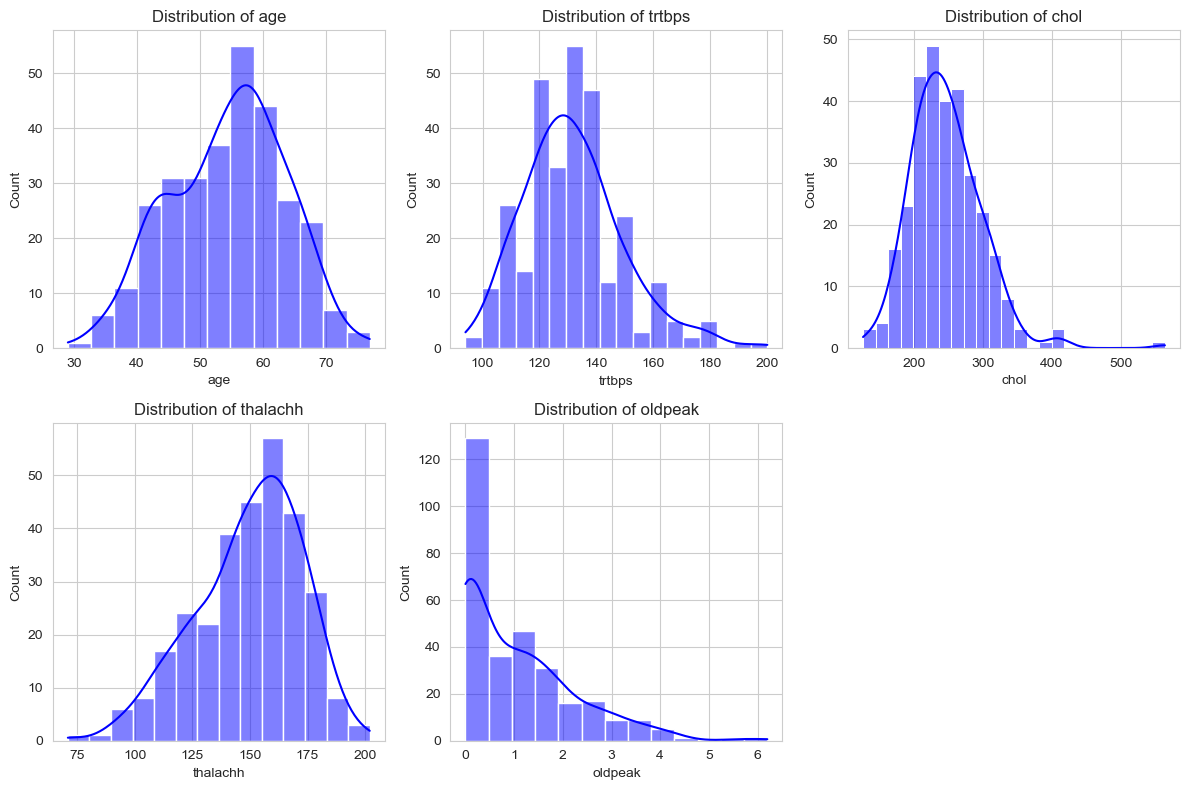

/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/1528174822.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_data_cleaned, x=feature, palette='viridis')
/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/1528174822.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_data_cleaned, x=feature, palette='viridis')
/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/1528174822.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_data_cleaned, x=feature, palette=

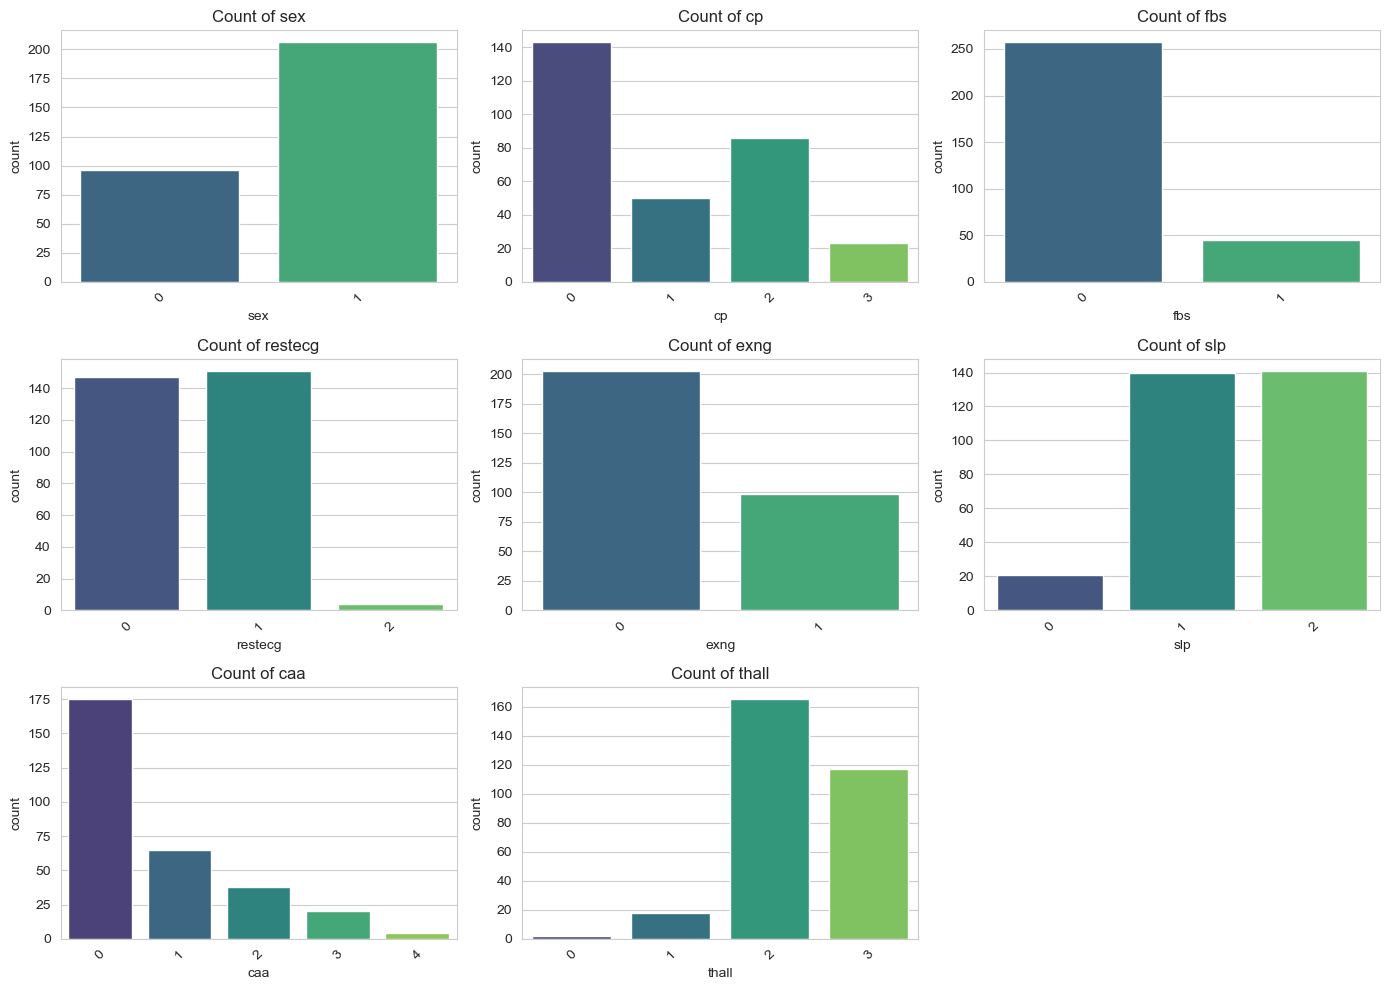

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots
sns.set_style("whitegrid")

# List of continuous features for histogram plots
continuous_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Plot histograms for continuous variables
plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=heart_data_cleaned, x=feature, kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


# List of categorical features
# Note: 'output' is the target variable; we won't plot it here as a categorical feature.
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Plot count plots for categorical variables
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=heart_data_cleaned, x=feature, palette='viridis')
    plt.title(f"Count of {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Analysis

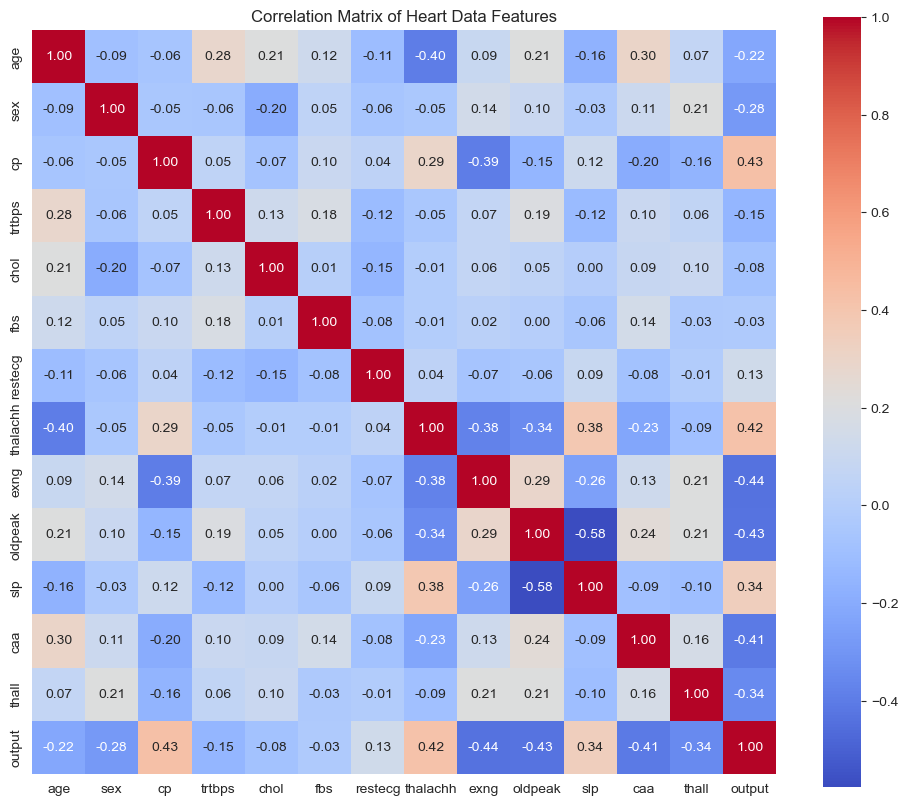

Correlation of features with the target (output):
output      1.000000
cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64


In [14]:
# Compute correlation matrix for continuous features in heart_data_cleaned
corr_matrix = heart_data_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Heart Data Features")
plt.show()

# Identify top correlated features with the target 'output'
target_correlations = corr_matrix['output'].sort_values(ascending=False)
print("Correlation of features with the target (output):")
print(target_correlations)

## Bivariate Analysis (Feature vs. Target)

/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/1372828746.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_data_cleaned, palette='Set2')
/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/1372828746.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_data_cleaned, palette='Set2')
/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/1372828746.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_d

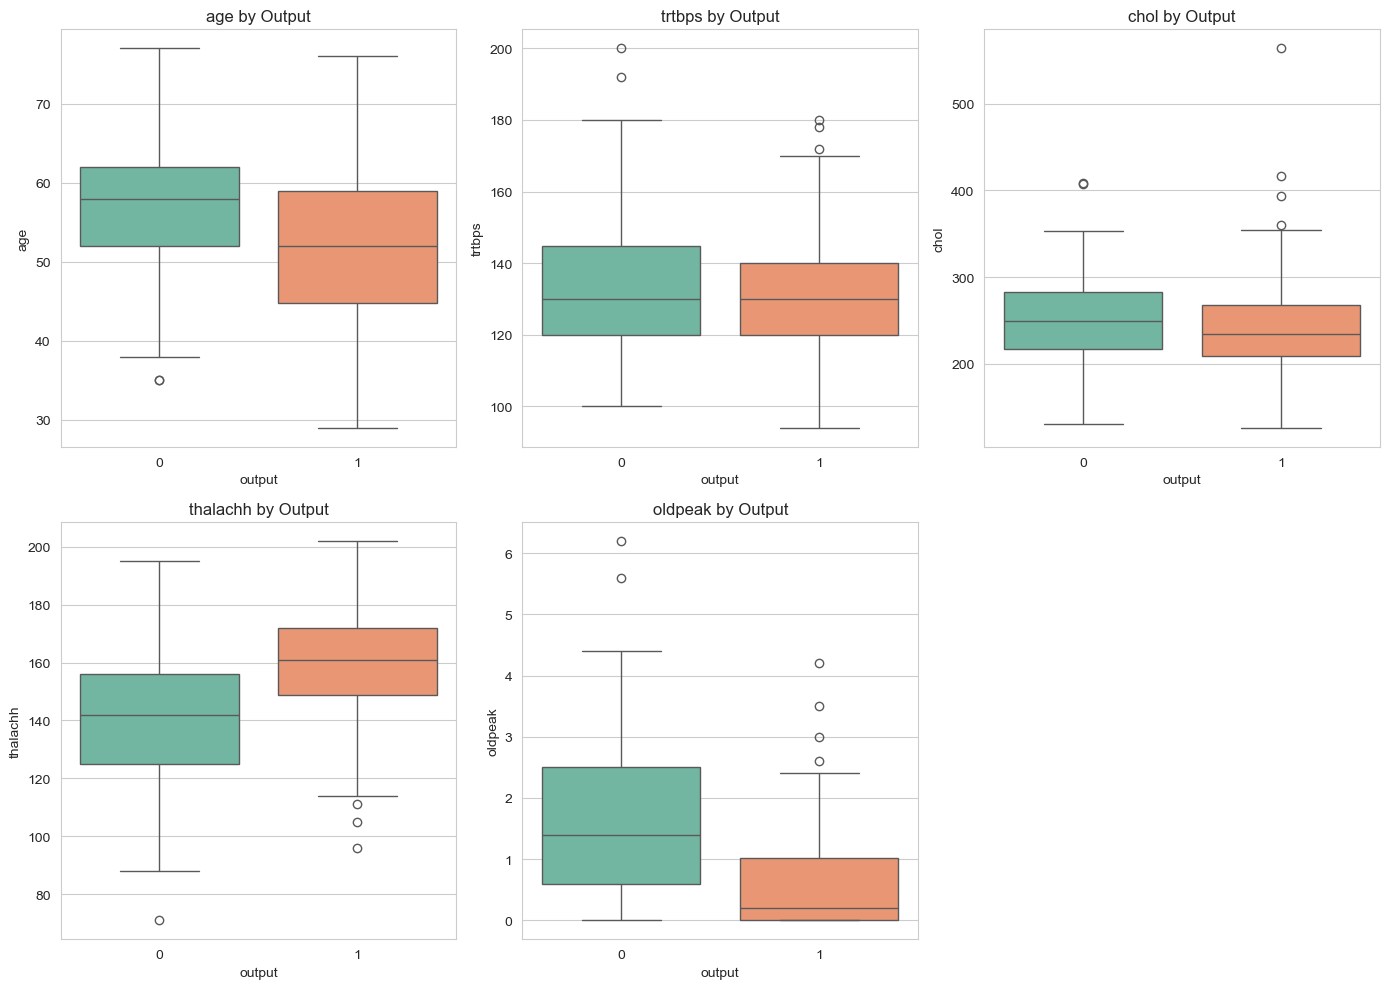

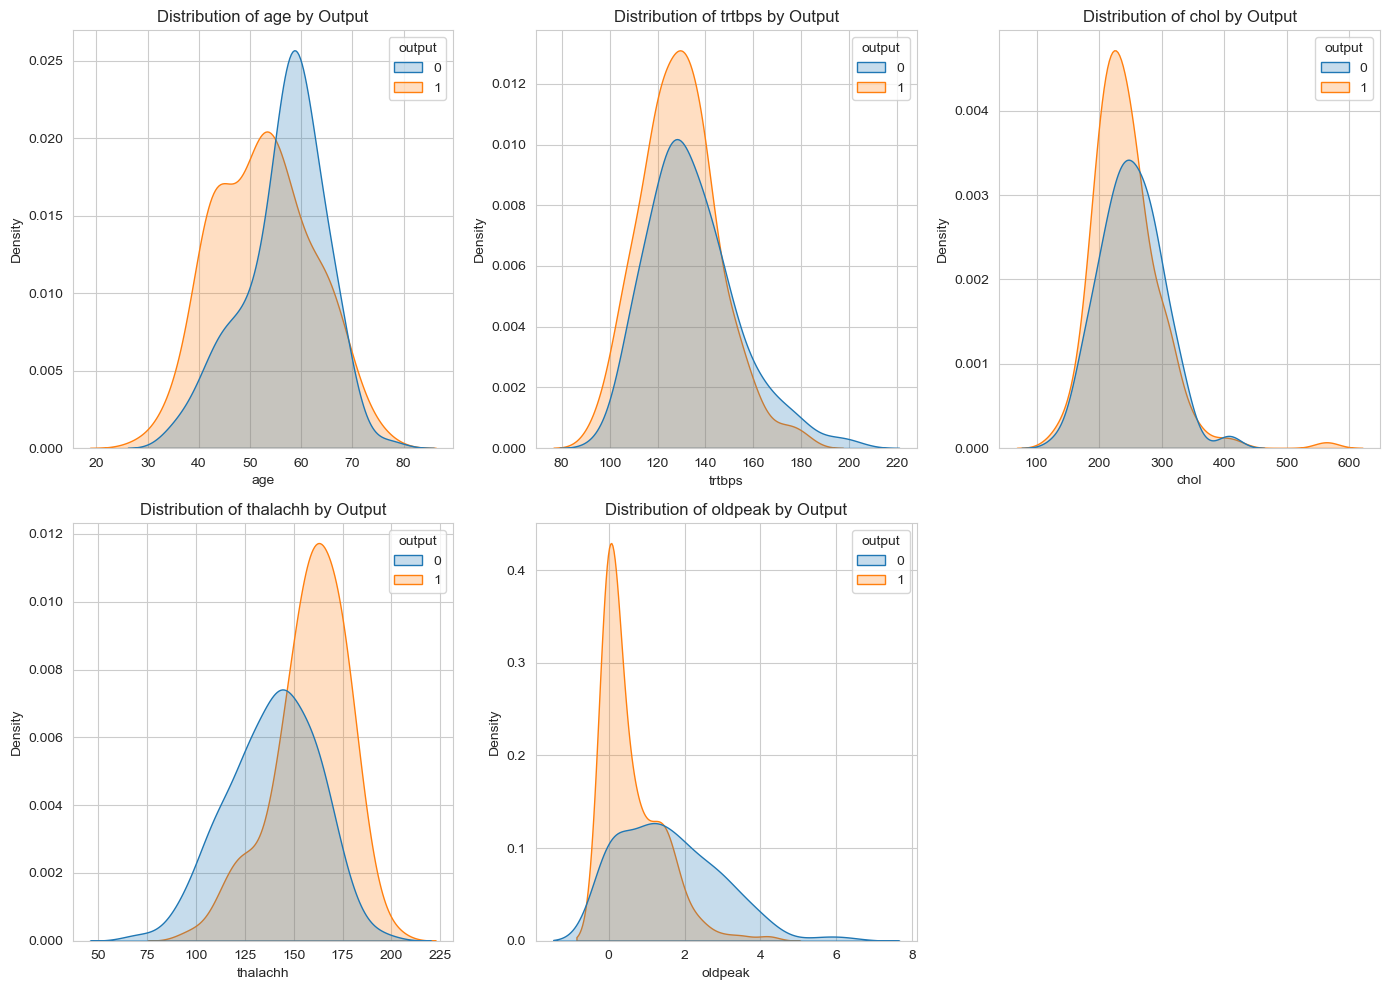

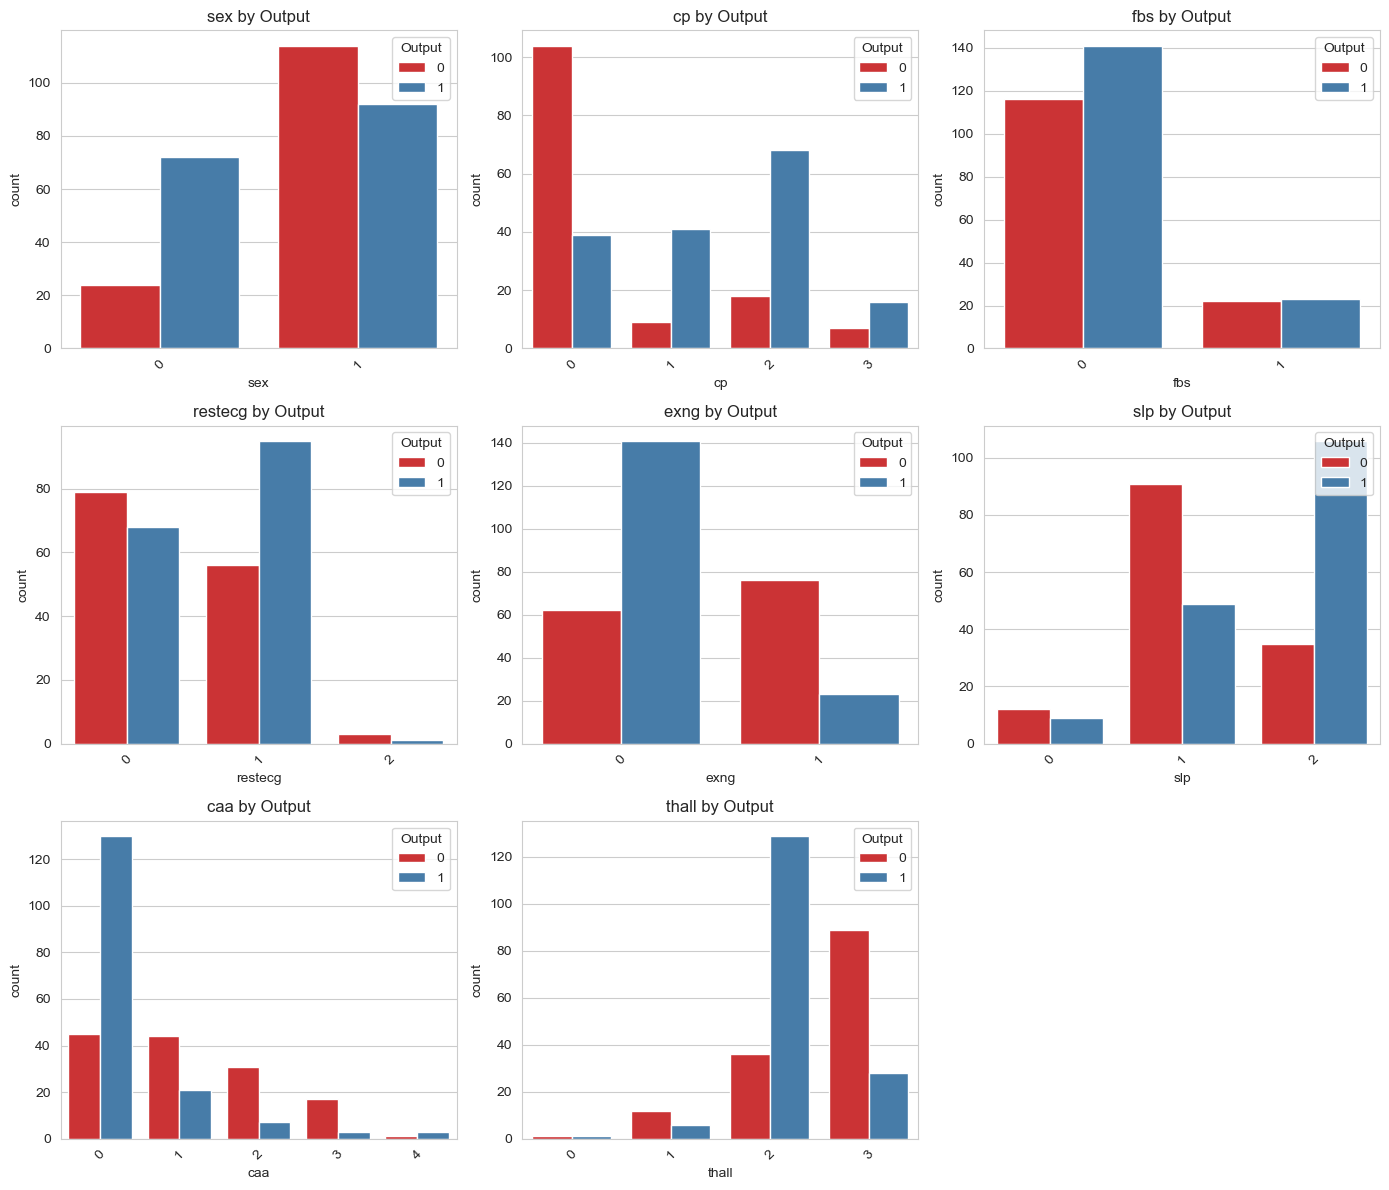

In [15]:
# For continuous features, let's see how their distribution differs by the target
continuous_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='output', y=feature, data=heart_data_cleaned, palette='Set2')
    plt.title(f"{feature} by Output")
plt.tight_layout()
plt.show()

# Additionally, let's check distribution plots of continuous features by target class
plt.figure(figsize=(14, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=heart_data_cleaned, x=feature, hue='output', fill=True)
    plt.title(f"Distribution of {feature} by Output")
plt.tight_layout()
plt.show()


# For categorical features, let's examine their relationship with the target
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=heart_data_cleaned, x=feature, hue='output', palette='Set1')
    plt.title(f"{feature} by Output")
    plt.legend(title='Output', loc='upper right')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploring the O2 Saturation Data

O2 Saturation Data (Cleaned) Preview:
    98.6
0   98.6
3   98.1
4   97.5
23  98.0
45  97.0


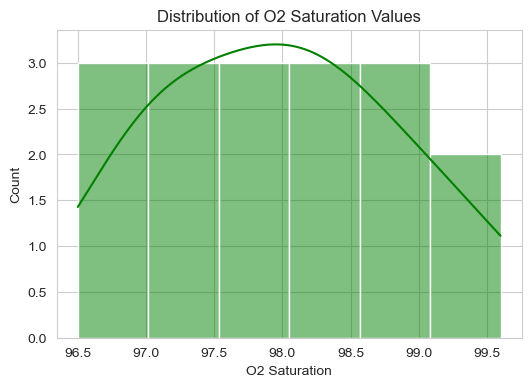


Unique O2 Saturation values: [98.6 98.1 97.5 98.  97.  96.5 97.1 97.6 98.2 96.9 97.9 97.2 99.3 98.9
 98.3 99.6 98.8]


In [16]:
print("O2 Saturation Data (Cleaned) Preview:")
print(o2_data_cleaned.head())

# Distribution of O2 saturation values
plt.figure(figsize=(6,4))
sns.histplot(o2_data_cleaned['98.6'], kde=True, color='green')
plt.title("Distribution of O2 Saturation Values")
plt.xlabel("O2 Saturation")
plt.show()

# Since there are only unique values of O2 saturation after duplicates are removed, let's list them:
unique_o2 = o2_data_cleaned['98.6'].unique()
print("\nUnique O2 Saturation values:", unique_o2)

## Class Distribution and Potential Imbalance

Class Distribution in Target (Output):
output
1    164
0    138
Name: count, dtype: int64


/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/3388552268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=heart_data_cleaned, palette='pastel')


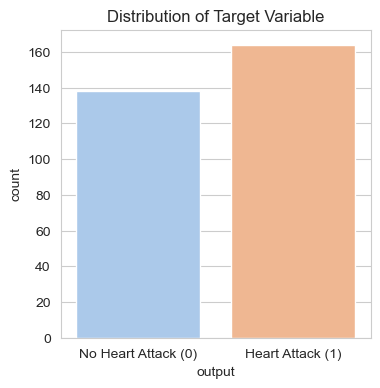

In [17]:
class_counts = heart_data_cleaned['output'].value_counts()
print("Class Distribution in Target (Output):")
print(class_counts)

plt.figure(figsize=(4,4))
sns.countplot(x='output', data=heart_data_cleaned, palette='pastel')
plt.title("Distribution of Target Variable")
plt.xticks([0,1], ['No Heart Attack (0)', 'Heart Attack (1)'])
plt.show()

## Pairwise Relationships (Pair Plots)

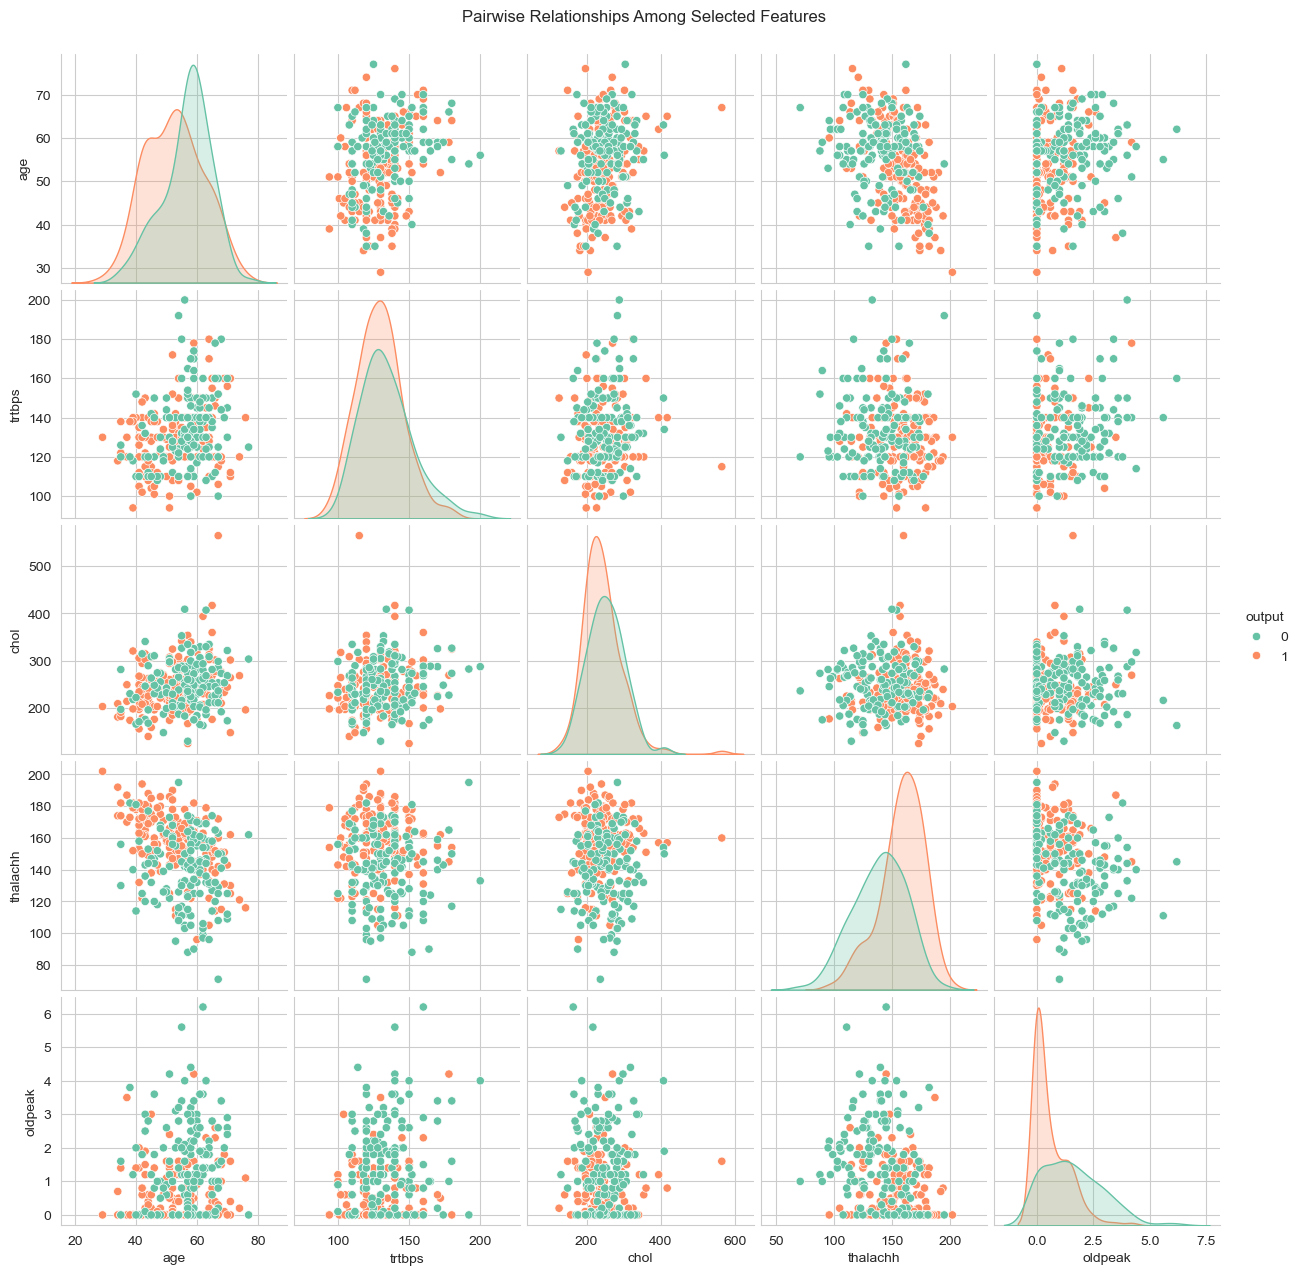

In [18]:
# Select a subset of continuous features for pair plots
subset_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']
sns.pairplot(heart_data_cleaned[subset_features], hue='output', diag_kind='kde', palette='Set2')
plt.suptitle("Pairwise Relationships Among Selected Features", y=1.02)
plt.show()

## Groupwise Summary Statistics

In [19]:
# Groupby target and describe numeric features
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
grouped_stats = heart_data_cleaned.groupby('output')[numeric_features].describe().T
print("Groupwise Summary Statistics by Target:")
display(grouped_stats)

Groupwise Summary Statistics by Target:


output                   0           1
age      count  138.000000  164.000000
         mean    56.601449   52.585366
         std      7.962082    9.511957
         min     35.000000   29.000000
         25%     52.000000   44.750000
         50%     58.000000   52.000000
         75%     62.000000   59.000000
         max     77.000000   76.000000
trtbps   count  138.000000  164.000000
         mean   134.398551  129.250000
         std     18.729944   16.204739
         min    100.000000   94.000000
         25%    120.000000  120.000000
         50%    130.000000  130.000000
         75%    144.750000  140.000000
         max    200.000000  180.000000
chol     count  138.000000  164.000000
         mean   251.086957  242.640244
         std     49.454614   53.456580
         min    131.000000  126.000000
         25%    217.250000  208.750000
         50%    249.000000  234.500000
         75%    283.000000  267.250000
         max    409.000000  564.000000
thalachh count  138.000000  164.000000
         mean   139.101449  158.378049
         std     22.598782   19.199080
         min     71.000000   96.000000
         25%    125.000000  148.750000
         50%    142.000000  161.000000
         75%    156.000000  172.000000
         max    195.000000  202.000000
oldpeak  count  138.000000  164.000000
         mean     1.585507    0.586585
         std      1.300340    0.781734
         min      0.000000    0.000000
         25%      0.600000    0.000000
         50%      1.400000    0.200000
         75%      2.500000    1.025000
         max      6.200000    4.200000

## Checking for Non-linear Relationships

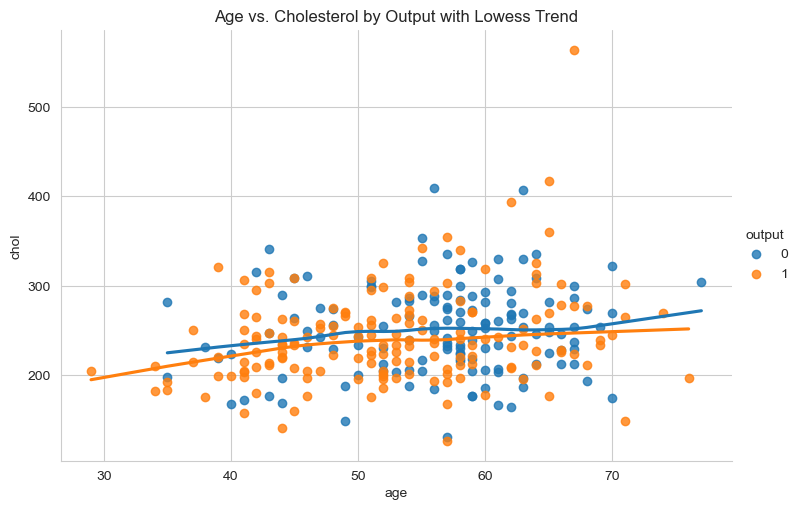

In [20]:
sns.lmplot(data=heart_data_cleaned, x='age', y='chol', hue='output', lowess=True, aspect=1.5)
plt.title("Age vs. Cholesterol by Output with Lowess Trend")
plt.show()

Outlier Analysis

/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/2224021373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_data_cleaned, palette='cool')
/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/2224021373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_data_cleaned, palette='cool')
/var/folders/w2/6l9xx_013k37fmx87v53pcw80000gn/T/ipykernel_40428/2224021373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_d

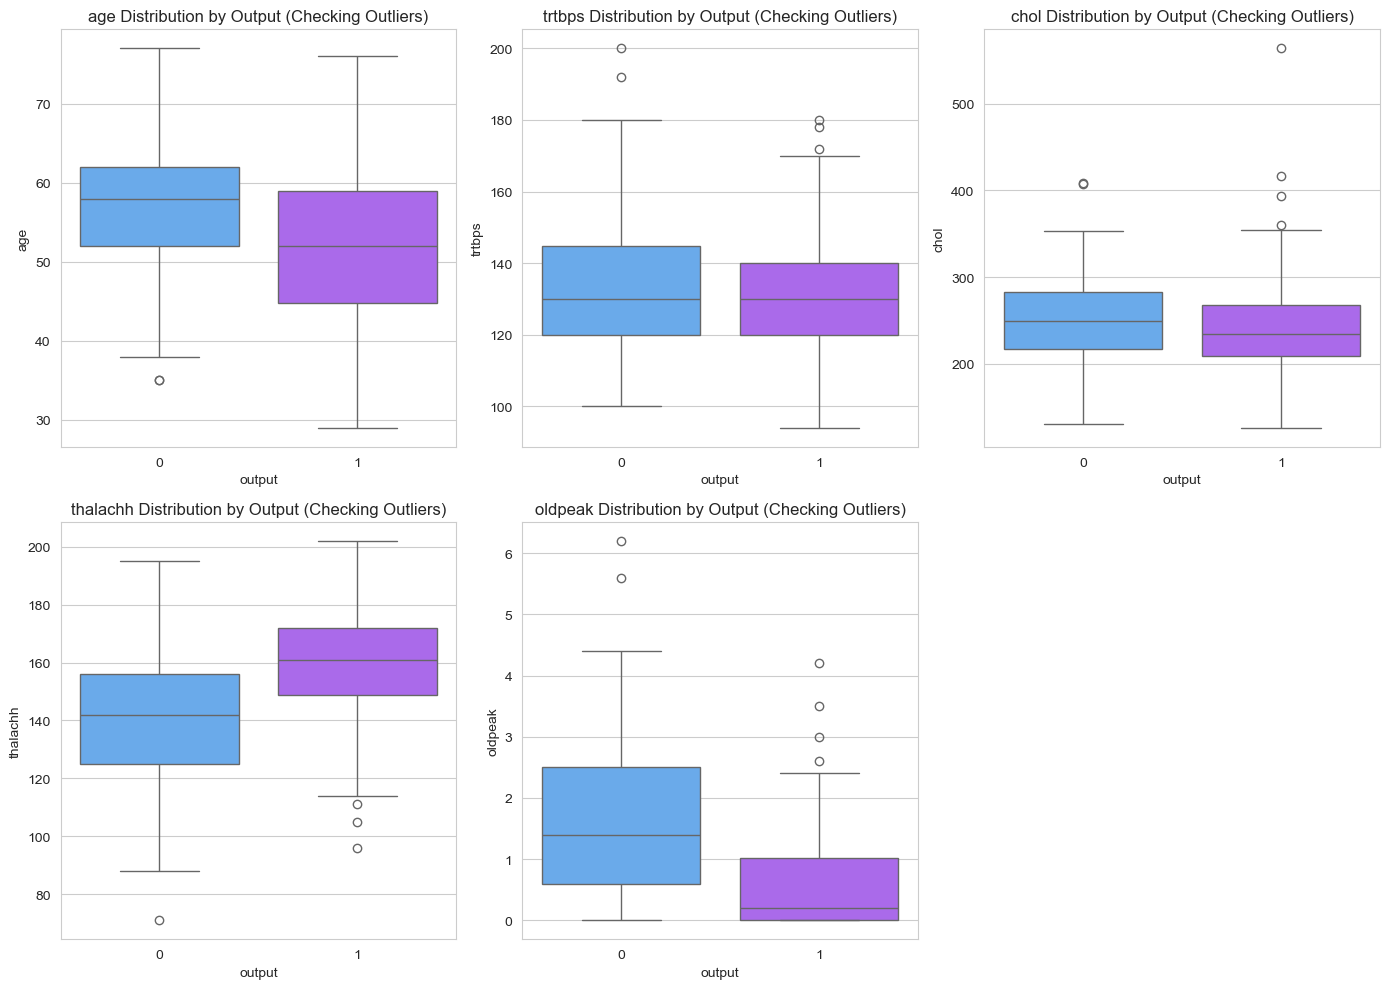

In [21]:
# Boxplots for numeric features to visually inspect outliers in each target class
plt.figure(figsize=(14,10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='output', y=feature, data=heart_data_cleaned, palette='cool')
    plt.title(f"{feature} Distribution by Output (Checking Outliers)")
plt.tight_layout()
plt.show()

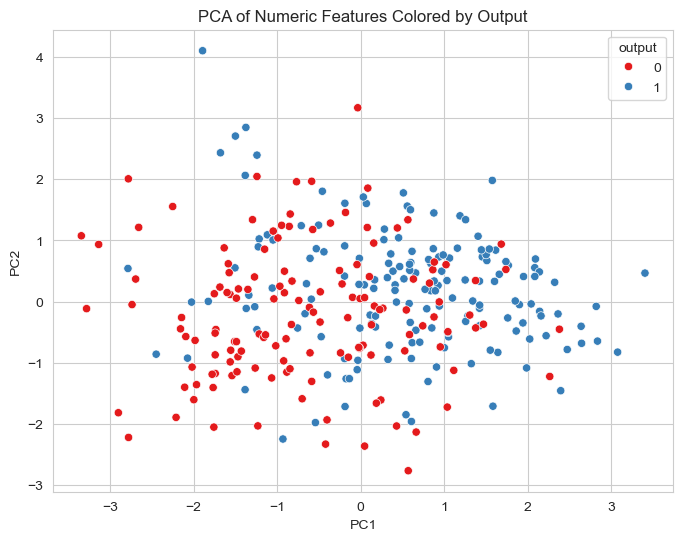

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Consider only numeric features for PCA
X_numeric = heart_data_cleaned[numeric_features]
X_scaled = StandardScaler().fit_transform(X_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['output'] = heart_data_cleaned['output'].values

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='output', data=pca_df, palette='Set1')
plt.title("PCA of Numeric Features Colored by Output")
plt.show()
